## Collinear features effect on linear models

In [ ]:
#Importing essantial packages.
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#For this task we are using custom data.
data = pd.read_csv('d.csv')

In [ ]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [ ]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

####  1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Create a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above  1.
</pre>


In [ ]:
#Printing the correlation between features.
data.corr(method="spearman")

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.279215,0.815543,1.000000,-0.279215,0.994639,0.554162,0.750583
y,-0.279215,1.000000,-0.510861,-0.279215,1.000000,-0.337037,-0.438569,-0.737998
z,0.815543,-0.510861,1.000000,0.815543,-0.510861,0.856275,0.631669,0.868640
x*x,1.000000,-0.279215,0.815543,1.000000,-0.279215,0.994639,0.554162,0.750583
2*y,-0.279215,1.000000,-0.510861,-0.279215,1.000000,-0.337037,-0.438569,-0.737998
2*z+3*x*x,0.994639,-0.337037,0.856275,0.994639,-0.337037,1.000000,0.586431,0.798917
w,0.554162,-0.438569,0.631669,0.554162,-0.438569,0.586431,1.000000,0.629805
target,0.750583,-0.737998,0.868640,0.750583,-0.737998,0.798917,0.629805,1.000000


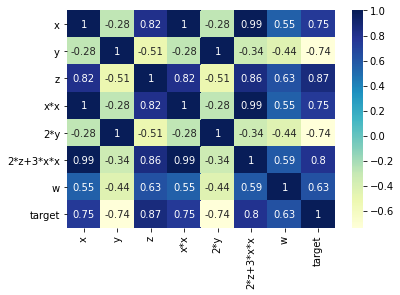

In [ ]:
#Plotting the heatmap of correlation between data.
ax=sns.heatmap(data.corr(method='spearman'),cmap="YlGnBu",annot=True)

#Task 1 (Logistic Regression)

In [ ]:
#finding besst hyper parameter for logistic regression.
from sklearn.linear_model import LogisticRegression
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
lr=LogisticRegression()
grid_values={'penalty': penalty,'C':C}
grid_clf = GridSearchCV(lr, param_grid = grid_values)
grid_clf.fit(X,Y)
print("We found best \"HYPER-PARAMETER ,PENALTY :",grid_clf.best_params_)

We found best "HYPER-PARAMETER ,PENALTY : {'C': 0.0001, 'penalty': 'l2'}


In [ ]:
#Training the logistic regression with BEST HYPERPARAMETER and PENALTY (Best Model).
import pandas
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
Best_Model_logreg=LogisticRegression(penalty='l2',C=0.0001)
Best_Model_logreg.fit(x_train,y_train)
y_pred=Best_Model_logreg.predict(x_test)
best_score = accuracy_score(y_test,y_pred)
print("we found best accuracy :",best_score)

we found best accuracy : 0.48


In [ ]:
bm=data.columns
print(bm)
print("Feature names _____Importance")
for i2,v2 in enumerate(Best_Model_logreg.coef_[0]):
  print(bm[i2],"----------------",v2)

Index(['x', 'y', 'z', 'x*x', '2*y', '2*z+3*x*x', 'w', 'target'], dtype='object')
Feature names _____Importance
x ---------------- 0.002498607940814591
y ---------------- -0.0025967677500452657
z ---------------- 0.0036033196572620094
x*x ---------------- 0.002487598265391399
2*y ---------------- -0.0025967677500452644
2*z+3*x*x ---------------- 0.0026738980638405458
w ---------------- 0.0023005454495008295


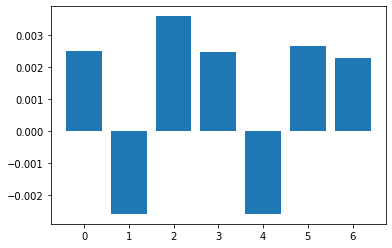

In [ ]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(Best_Model_logreg.coef_[0]))], Best_Model_logreg.coef_[0])
pyplot.show()

In [ ]:
#Creating a epsilon value for pertubation test.
E = np.random.normal(0, 0.11, 1)
E

array([0.04239004])

In [ ]:
#Adding epsilion value to data.
X1=x_train+E
print(X1.shape)

(75, 7)


In [ ]:
Best_Model_with_epsilon=LogisticRegression(penalty='l2',C=0.0001)
Best_Model_with_epsilon.fit(X1,y_train)
y_pred_new=Best_Model_with_epsilon.predict(x_test)
best_score_new = accuracy_score(y_test,y_pred_new)
print("we found best accuracy :",best_score_new)

we found best accuracy : 0.48


In [ ]:
bm=data.columns
print("Feature names _____Importance")
for i,v in enumerate(Best_Model_with_epsilon.coef_[0]):
  print(bm[i],"----------------",v)

Feature names _____Importance
x ---------------- 0.0024986066974343702
y ---------------- -0.002596772364332336
z ---------------- 0.0036033135967510105
x*x ---------------- 0.0024875977076348273
2*y ---------------- -0.00259677236433232
2*z+3*x*x ---------------- 0.0026738968288198086
w ---------------- 0.0023005476763268942


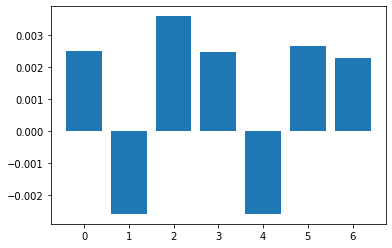

In [ ]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(Best_Model_with_epsilon.coef_[0]))], Best_Model_with_epsilon.coef_[0])
pyplot.show()

#Task 2 (SVM)

In [ ]:
#finding besst hyper parameter for svm.
from sklearn import svm
C = np.logspace(-4, 4, 50)
lrs=svm.SVC(kernel='rbf')
grid_values1={'C':C}
grid_clf1 = GridSearchCV(lrs,param_grid = grid_values1)
grid_clf1.fit(X,Y)
print("We found best \"HYPER-PARAMETER (regularization parameter):",grid_clf1.best_params_)

We found best "HYPER-PARAMETER (regularization parameter): {'C': 0.0001}


In [ ]:
#Training the svm with BEST HYPERPARAMETER and PENALTY (Best Model).
import pandas
from sklearn.model_selection import train_test_split
Best_Model_svm=svm.SVC(C=0.0001,kernel='linear')
Best_Model_svm.fit(x_train,y_train)
y_pred1=Best_Model_svm.predict(x_test)
best_score1 = accuracy_score(y_test,y_pred1)
print("we found best accuracy for SVM :",best_score1)

we found best accuracy for SVM : 0.48


In [ ]:
bm=data.columns
print("Feature names _____Importance")
for i2,v2 in enumerate(Best_Model_svm.coef_[0]):
  print(bm[i2],"----------------",v2)

Feature names _____Importance
x ---------------- 0.004839605504571616
y ---------------- -0.0051643874393826235
z ---------------- 0.007127590836082678
x*x ---------------- 0.004803876113765956
2*y ---------------- -0.005164387439382623
2*z+3*x*x ---------------- 0.0051840624724073655
w ---------------- 0.00445112316799278


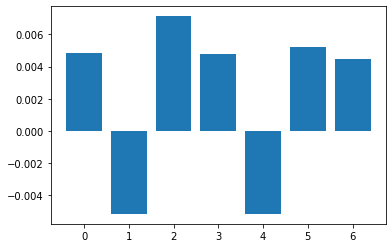

In [ ]:
pyplot.bar([x for x in range(len(Best_Model_svm.coef_[0]))], Best_Model_svm.coef_[0])
pyplot.show()

In [ ]:
Best_Model_svm_with_epsilon=svm.SVC(C=0.0001,kernel='linear')
Best_Model_svm_with_epsilon.fit(X1,y_train)
y_pred_new_svm=Best_Model_svm_with_epsilon.predict(x_test)
best_score_new_svm = accuracy_score(y_test,y_pred_new_svm)
print("we found best accuracy :",best_score_new_svm)

we found best accuracy : 0.48


In [ ]:
print("Feature names _____Importance")
for i1,v1 in enumerate(Best_Model_svm_with_epsilon.coef_[0]):
  print(bm[i1],v1)

Feature names _____Importance
x 0.004839605504571616
y -0.0051643874393826235
z 0.007127590836082679
x*x 0.004803876113765957
2*y -0.0051643874393826235
2*z+3*x*x 0.005184062472407365
w 0.00445112316799278


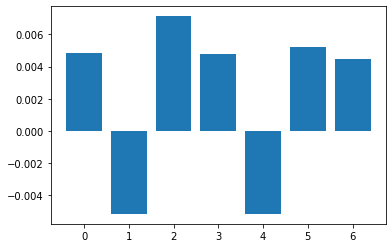

In [ ]:
pyplot.bar([x for x in range(len(Best_Model_svm_with_epsilon.coef_[0]))], Best_Model_svm_with_epsilon.coef_[0])
pyplot.show()